In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [7]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
categorical_columns = ['gender','smoking_history']

label_encoder = LabelEncoder()
label_mapping = {}

for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])
    label_mapping[col] = (dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

label_mapping

{'gender': {'Female': 0, 'Male': 1, 'Other': 2},
 'smoking_history': {'No Info': 0,
  'current': 1,
  'ever': 2,
  'former': 3,
  'never': 4,
  'not current': 5}}

In [21]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
categorical_columns = ['gender','smoking_history']

label_encoder = LabelEncoder()

for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

X = dataset.drop('diabetes', axis=1)
Y = dataset['diabetes']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

model = XGBClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test).astype(np.int64)
predictions_df = pd.DataFrame({'true value':Y_test,'prediction':Y_pred})

print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.97056
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22891
           1       0.96      0.68      0.80      2109

    accuracy                           0.97     25000
   macro avg       0.97      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

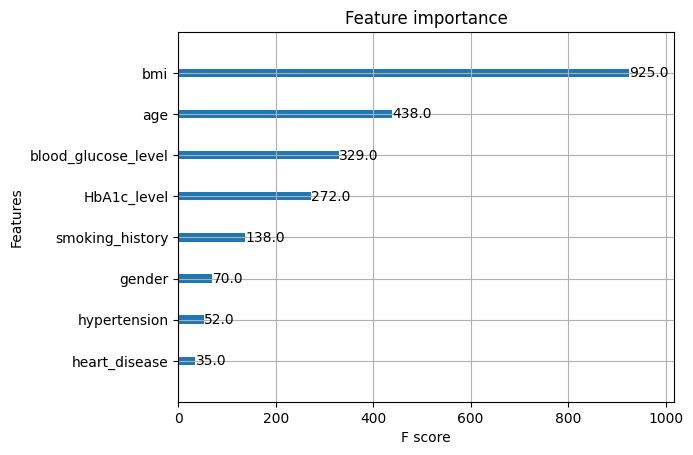

In [16]:
plot_importance(model)

0.95312
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22879
           1       0.69      0.81      0.75      2121

    accuracy                           0.95     25000
   macro avg       0.84      0.89      0.86     25000
weighted avg       0.96      0.95      0.95     25000



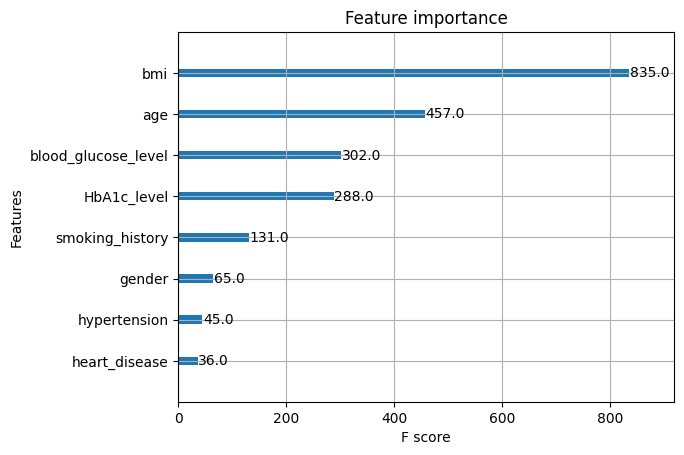

In [51]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
categorical_columns = ['gender','smoking_history']

label_encoder = LabelEncoder()

for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

X = dataset.drop('diabetes', axis=1)
Y = dataset['diabetes']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=10)

#low probability because we'd rather recommend someone go to the doctor for real diabetes tests even if they don't have it
#vs telling them they don't have diabetes when they do (higher recall, lower precision is preferable to lower recall, higher precision)
prob_threshold = 0.2

model = XGBClassifier()
model.fit(X_train,Y_train)
y_proba = model.predict_proba(X_test)
Y_pred = (y_proba[:, 1] >= prob_threshold).astype(int)
predictions_df = pd.DataFrame({'true value':Y_test,'prediction':Y_pred})

plot_importance(model)
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))